# Sign Language Recogination

# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('archive/sign_mnist_train.csv')
test=pd.read_csv('archive/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
# get our training labels
labels = train['label'].values

In [6]:
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

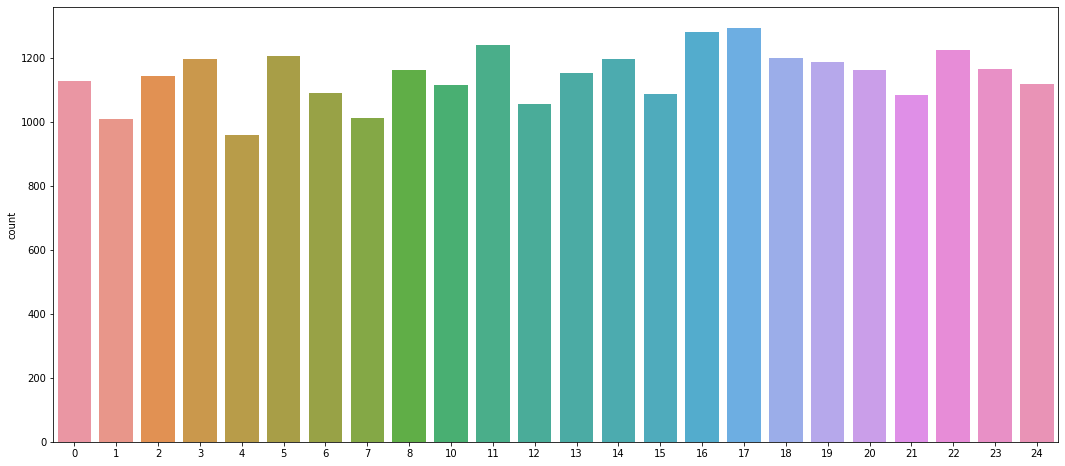

In [7]:
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [8]:
train.drop('label',axis =1,inplace = True)

In [9]:
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


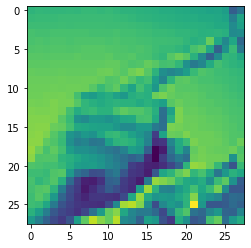

In [12]:
index = 1
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [13]:
import cv2

In [14]:
for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample,None , fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size = 0.3,random_state=101)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

batch_size = 120
num_classes=24
epochs = 10

In [17]:
x_train = x_train / 255
x_test = x_test / 255

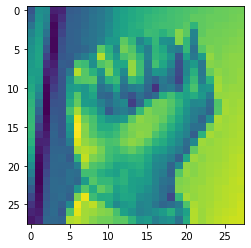

In [18]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)


plt.imshow(x_train[0].reshape(28,28))

In [19]:
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [20]:
model.compile(optimizer=Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [22]:
history = model.fit(x_train,y_train,validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
161/161 [==============================] - 18s 109ms/step - loss: 1.9023 - accuracy: 0.4391 - val_loss: 0.6769 - val_accuracy: 0.8186
Epoch 2/10
161/161 [==============================] - 18s 112ms/step - loss: 0.5354 - accuracy: 0.8342 - val_loss: 0.2171 - val_accuracy: 0.9488
Epoch 3/10
161/161 [==============================] - 17s 106ms/step - loss: 0.2288 - accuracy: 0.9300 - val_loss: 0.0819 - val_accuracy: 0.9851
Epoch 4/10
161/161 [==============================] - 16s 101ms/step - loss: 0.1128 - accuracy: 0.9707 - val_loss: 0.0299 - val_accuracy: 0.9975
Epoch 5/10
161/161 [==============================] - 17s 105ms/step - loss: 0.0699 - accuracy: 0.9815 - val_loss: 0.0129 - val_accuracy: 0.9999
Epoch 6/10
161/161 [==============================] - 16s 102ms/step - loss: 0.0433 - accuracy: 0.9891 - val_loss: 0.0085 - val_accuracy: 0.9999
Epoch 7/10
161/161 [==============================] - 16s 102ms/step - loss: 0.0307 - accuracy: 0.9921 - val_loss: 0.0059 - val_ac

In [23]:
model.save("sign_mnist_cm_Epochs.h5")
print("Model Saved")

Model Saved


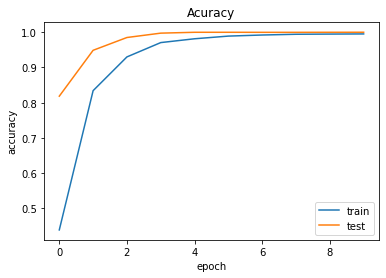

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Acuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [25]:
test_labels=test['label']
test.drop('label',axis = 1, inplace=True)

test_images = test.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

test_images.shape

y_pred = model.predict(test_images)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels,y_pred.round())

0.8969604015616286

In [27]:
def getLeetter(result):
    classLabels = {0:'A',
                   1:'B',
                   2:'C',
                   3:'D',
                   4:'E',
                   5:'F',
                   6:'G',
                   7:'H',
                   8:'I',
                   9:'J',
                   10:'K',
                   11:'L',
                   12:'M',
                   13:'N',
                   14:'O',
                   15:'P',
                   16:'Q',
                   17:'R',
                   18:'S',
                   19:'T',
                   20:'U',
                   21:'V',
                   22:'W',
                   23:'X',
                   24:'Y',
                   25:'Z'}
    try:
        res=int(result)
        return classLabels[res]
    except:
        return "Error"

In [30]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    roi=frame[100:400,320:620]
    cv2.imshow('roi',roi)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    roi= cv2.resize(roi,(28,28), interpolation=cv2.INTER_AREA)
    
    cv2.imshow('roi sacled and gray',roi)
    copy = frame.copy()
    cv2.rectangle(copy,(320,100),(620,400),(255,0,0),5)
    
    roi=roi.reshape(1,28,28,1)
    
    #result=str(model.predict_classes(roi,1,verbose=0)[0])
    result_predict=str(model.predict(roi,1,verbose=0)[0])
    result=str(np.argmax(result_predict))
    cv2.putText(copy,str(result),(300,100),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,0),2)
    cv2.imshow('frame',copy)
    
    if cv2.waitKey(1)==13:
        break
        
        
cap.release()
cv2.destroyAllWindows()